<a href="https://colab.research.google.com/github/moizarsalan/Artificial-Neural-Network/blob/main/Lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Abdul Moiz Arsalan**

### **B22F1086AI072**

### **Lab: 07**

### **Lab Instructor: Mam Ammara Irfan**

### **Course Instructor: Dr Arshad Iqbal**

## **Lab Tasks:**

1.  Use dataset of your own choice.
2.  Build a little bit complex ANN Model.
3.  Train & Evaluate model on different optimizers.
4.  Compare perfomance of optimizers.
5.  How does the learning rate impact the performance of different optimizers?

* A high learning rate (≥0.1) speeds up training but can cause instability, especially in SGD, leading to oscillations. Adam and RMSprop handle it better but may still fail to reach optimal accuracy. A low learning rate (≤0.0001) ensures precise learning but slows convergence. SGD struggles, while Adam and RMSprop adapt better but take longer to train. A moderate learning rate (0.01 for SGD, 0.001 for Adam) provides a good balance between speed and accuracy.

6.  How does batch size affect training convergence with different optimizers?

* A small batch size (16-32) improves generalization but increases noise in updates, making SGD unstable, while Adam and RMSprop manage it better. A large batch size (256-1024) speeds up training but risks overfitting, particularly with Adam and RMSprop. SGD performs better with large batches as it reduces update noise. The best balance is a batch size of 64-128, ensuring stable and effective learning.

7.  How does dropout and batch normalization influence optimizer performance?

* Dropout (30-50%) prevents overfitting by randomly deactivating neurons, benefiting SGD, while Adam and RMSprop slow down slightly. Batch Normalization stabilizes activations and speeds up training, significantly improving SGD while also benefiting Adam and RMSprop. Using Batch Normalization in all cases and Dropout in deep networks ensures stable training.

In [1]:
# Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad

## **Step 2: Load and Preprocess CIFAR-10 Dataset**


* The CIFAR-10 dataset consists of 60,000 images in 10 categories (cars, dogs, airplanes, etc.).
* We normalize the pixel values to 0-1 range for better training efficiency.
Since an ANN expects 1D input, we flatten the images into vectors of size 3072 (32×32×3).

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values (scale between 0 and 1)
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

# Flatten images (since ANN expects 1D input)
x_train = x_train.reshape(x_train.shape[0], -1)  # Shape: (50000, 3072)
x_test = x_test.reshape(x_test.shape[0], -1)    # Shape: (10000, 3072)

## **Step 3: Define a Complex ANN Model**

* We create a deep Artificial Neural Network (ANN) with multiple layers.
* Each Dense layer has many neurons with ReLU activation to learn complex features.
* Batch Normalization speeds up learning, and Dropout (30%) prevents overfitting.
The final Softmax layer predicts one of the 10 output classes in CIFAR-10.

In [6]:
def create_complex_model():
    model = keras.Sequential([
        keras.layers.Dense(1024, activation='relu', input_shape=(32*32*3,)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
    ])
    return model

In [7]:
# Step 4: Define Optimizers
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "Momentum_SGD": SGD(learning_rate=0.01, momentum=0.9),
    "Adagrad": Adagrad(learning_rate=0.01),
    "RMSprop": RMSprop(learning_rate=0.01),
    "Adam": Adam(learning_rate=0.01)
}

In [8]:
# Step 5: Train and Evaluate the Model with Different Optimizers
results = {}
for name, opt in optimizers.items():
    print(f"Training with {name} optimizer...")

    model = create_complex_model()  # Ensure model is created correctly
    if model is None:
        print(f"Error: Model creation failed for {name} optimizer.")
        continue

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    results[name] = history.history


Training with SGD optimizer...
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.2279 - loss: 2.4366 - val_accuracy: 0.3844 - val_loss: 1.7172
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.3288 - loss: 1.8760 - val_accuracy: 0.4220 - val_loss: 1.6259
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.3668 - loss: 1.7603 - val_accuracy: 0.4367 - val_loss: 1.5820
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.3952 - loss: 1.6982 - val_accuracy: 0.4434 - val_loss: 1.5557
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.4056 - loss: 1.6653 - val_accuracy: 0.4470 - val_loss: 1.5483
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.4127 - loss: 1.6342 - val_accuracy: 0.4579 - val_loss: 1.5233
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.4219 - loss: 1.6179 - val_accuracy: 0.4688 - val_loss: 1.4858
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - acc

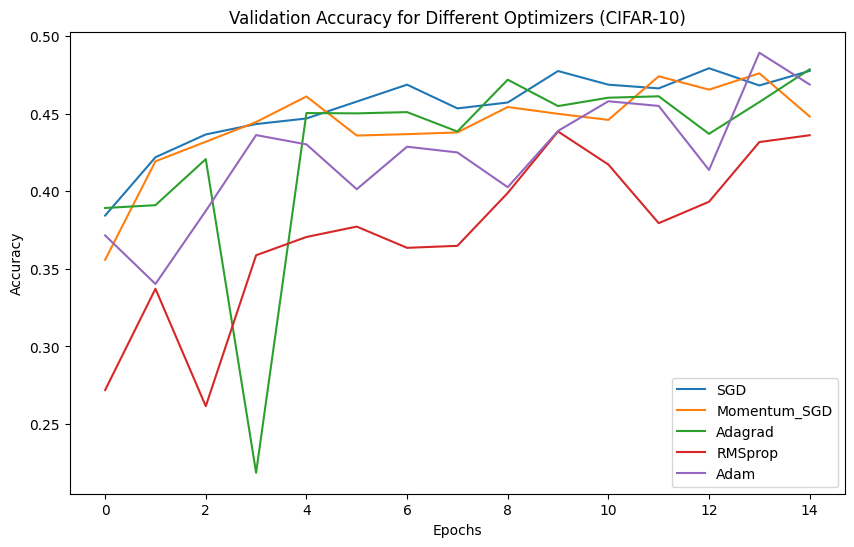

In [9]:
# Step 6: Compare Optimizer Performance
plt.figure(figsize=(10,6))
for name, history in results.items():
    plt.plot(history['val_accuracy'], label=name)
plt.title("Validation Accuracy for Different Optimizers (CIFAR-10)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()